In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import praw

user_agent = "Scrape 1.0 by Dono"
reddit = praw.Reddit(
    client_id ="Qt0RKr4jRmrky5cg0fuTwg",
    client_secret="bJENgeQl2nHWmTKFZDuS2PH5nEatIg",
    user_agent=user_agent
)

In [3]:
#hot new rising top
headlines = set()
for submission in reddit.subreddit("cryptocurrencynews").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

841


In [4]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Bank of America Opens Bitcoin Future Trading t...
1,Zerohex is Marketplace for Blockchain and Inte...
2,Excellent company
3,Are Strong Hands Still Accumulating Bitcoin?
4,Japan beefs up efforts to regulate the Crypto ...


In [5]:
df.to_csv("headlines.csv", header=False, encoding="utf-8", index=False)

In [6]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/donovan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line) # -> dict
    pol_score["headline"] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Bank of America Opens Bitcoin Future Trading to Clients',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Zerohex is Marketplace for Blockchain and Internet Services',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.5719, 'headline': 'Excellent company', 'neg': 0.0, 'neu': 0.213, 'pos': 0.787}]


In [8]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,Bank of America Opens Bitcoin Future Trading t...
1,0.0,1.000,0.000,0.0000,Zerohex is Marketplace for Blockchain and Inte...
2,0.0,0.213,0.787,0.5719,Excellent company
3,0.0,0.602,0.398,0.5106,Are Strong Hands Still Accumulating Bitcoin?
4,0.0,1.000,0.000,0.0000,Japan beefs up efforts to regulate the Crypto ...


In [9]:
df["label"] = 0
df.loc[df["compound"] > 0.2, "label"] = 1
df.loc[df["compound"] < -0.2, "label"] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,Bank of America Opens Bitcoin Future Trading t...,0
1,0.0,1.000,0.000,0.0000,Zerohex is Marketplace for Blockchain and Inte...,0
2,0.0,0.213,0.787,0.5719,Excellent company,1
3,0.0,0.602,0.398,0.5106,Are Strong Hands Still Accumulating Bitcoin?,1
4,0.0,1.000,0.000,0.0000,Japan beefs up efforts to regulate the Crypto ...,0


In [10]:
text = " ".join(review for review in df.headline)
print ("There are {} words in the combination of all headlines.".format(len(text)))

There are 71684 words in the combination of all headlines.


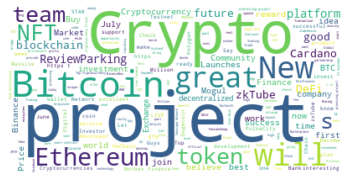

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "are", "they", "in", "we", "is"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
wine_mask = np.array(Image.open("ETH.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [52]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [53]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [54]:
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

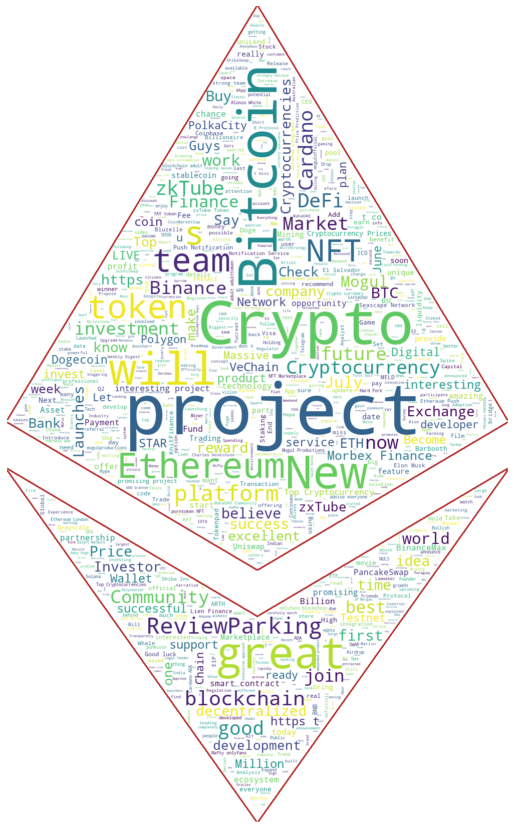

In [67]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("output.png")

# show
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
df2 = df[["headline", "label"]]

In [62]:
df2.to_csv("reddit_headlines_labels.csv", encoding="utf-8", index=False)

In [63]:
df.label.value_counts()

 0    397
 1    395
-1     49
Name: label, dtype: int64

In [64]:
df.label.value_counts(normalize=True) * 100

 0    47.205707
 1    46.967895
-1     5.826397
Name: label, dtype: float64

In [65]:
print("Positive headlines:\n")
pprint(list(df[df["label"] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df["label"] == -1].headline)[:5], width=200)

Positive headlines:

['Excellent company',
 'Are Strong Hands Still Accumulating Bitcoin?',
 'The innovative project begins its participation in ICO! #REALITY #BSC #BinanceSmartChain #Cryptocurency',
 'I sincerely believe in the success of the project and I hope that he will give all of us great pleasure with our technology',
 'zkTube offers the following advantages: Low Gas Fees and High Throughput, Secured Ethereum Mainnet Level,']

Negative headlines:

['Australians Lost 3x More to Scammers via Bank Transactions than Bitcoin Payments in 2020',
 'TikTok Crypto Ban: Why it Happened and What Next - Cryptocurrency News',
 'The most UNIQUE, The most AWESOME and the most HATED by HATERS project on the crypto worlds has come!',
 'Polka Dot rises more than 70% on US exchange Coinbase ── Is it due to a system failure?',
 'Anonymous Hacker Group Launches Anon Inu Crypto To Fight Musk And China']


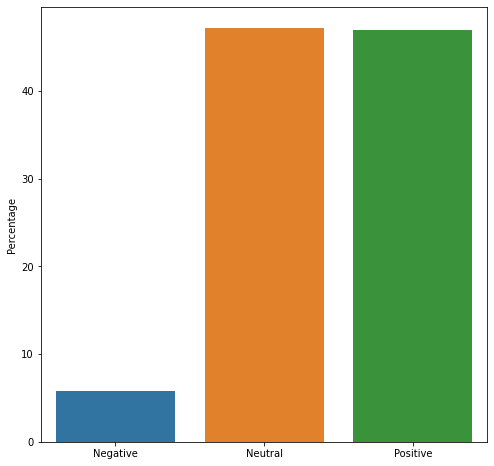

In [66]:
fig, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")

plt.show()